# Introduction

This notebook explores the keystroke dataset for the study titled __High-accuracy
detection of early Parkinson's Disease using multiple characteristics of finger
movement while typing__. The notebook goes through various data-cleaning
techniques to clean and consolidate the provided data files. A number of
observations and visualizations are also included.

In [9]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

In [10]:
combined_user_df = pd.read_csv('../data/combined_user.csv', index_col=0)
combined_user_df.head()

,BirthYear,Female,Parkinsons,Tremors,DiagnosisYear,Sided_Left,Sided_None,Sided_Right,UPDRS_1,UPDRS_2,...,RS_Flight time,SL_Hold time,SL_Latency time,SL_Flight time,SR_Hold time,SR_Latency time,SR_Flight time,SS_Hold time,SS_Latency time,SS_Flight time
GEYWAGTINR,1929.0,0,0,0,NaN,False,True,False,False,False,...,361.836236,118.793956,415.179542,428.981574,99.401782,455.345288,387.220976,135.443452,329.793125,224.696498
CEU6KM05RU,NaN,1,1,0,2006.0,False,True,False,False,False,...,283.431489,164.593130,291.460560,268.542494,115.088168,316.022901,292.391221,173.800000,328.100000,671.900000
EBGLZDVO5S,1953.0,1,1,1,2004.0,True,False,False,False,False,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5YFAPLRCMD,1967.0,0,1,1,2016.0,False,True,False,False,False,...,189.977419,105.507671,385.598754,321.539988,99.109244,469.705419,394.156936,141.666667,303.123333,172.266667
WDNE1Q9EHT,1941.0,1,1,0,2012.0,False,True,False,False,False,...,143.304698,103.853744,218.760793,196.470925,108.686111,241.352778,204.611806,99.650000,169.950000,87.850000


# Visualization

Missing data count:

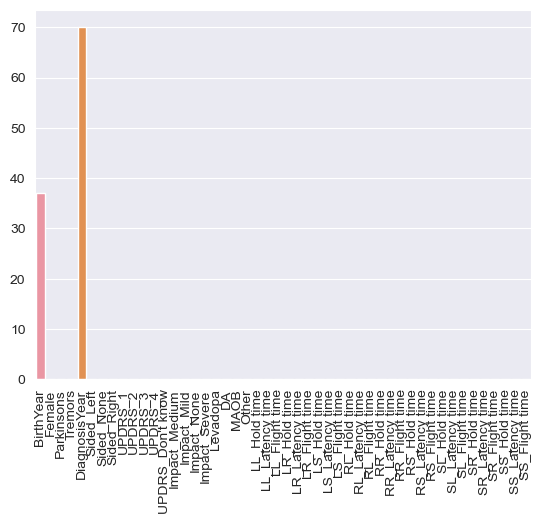

In [11]:
missing_data = combined_user_df.isnull().sum()

g = sns.barplot(x=missing_data.index, y=missing_data)
g.set_xticklabels(labels=missing_data.index, rotation=90)

plt.show()

Birth year distribution, gender count, and tremor count:

C:\Users\BruceVanHorn\AppData\Local\Temp\ipykernel_33424\809465702.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(
C:\Users\BruceVanHorn\AppData\Local\Temp\ipykernel_33424\809465702.py:9: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(


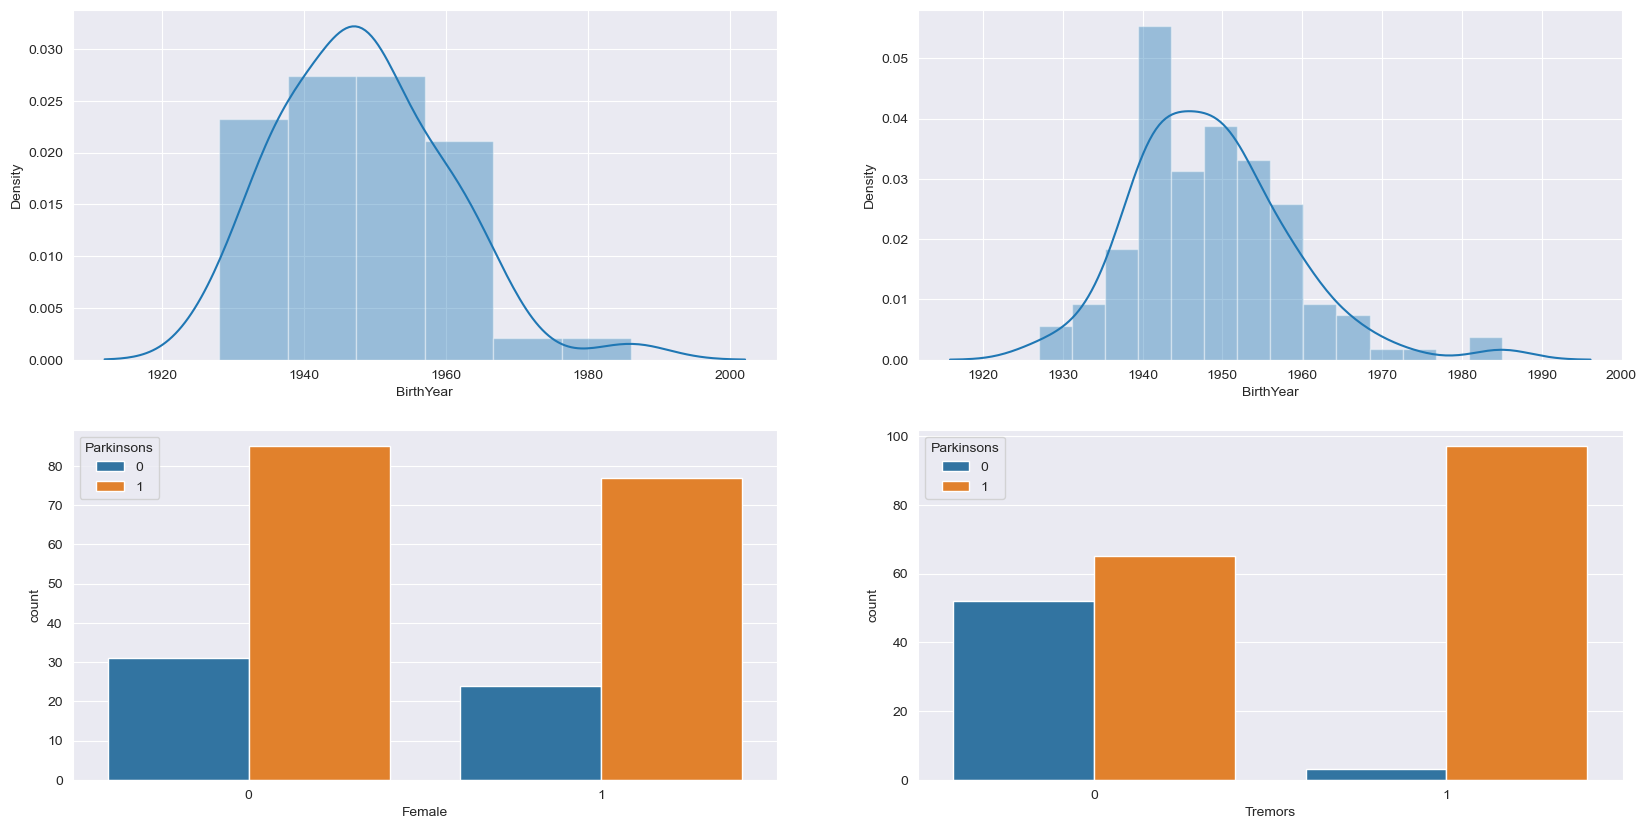

In [12]:
f, ax = plt.subplots(2, 2, figsize=(20, 10))


sns.distplot(
    combined_user_df.loc[combined_user_df['Parkinsons'] == 0, 'BirthYear'].dropna(axis=0),
    kde_kws = {'label': "Without Parkinson's"},
    ax = ax[0][0]
)
sns.distplot(
    combined_user_df.loc[combined_user_df['Parkinsons'] == 1, 'BirthYear'].dropna(axis=0),
    kde_kws = {'label': "With Parkinson's"},
    ax = ax[0][1]
)

sns.countplot(x='Female', hue='Parkinsons', data=combined_user_df, ax=ax[1][0])
sns.countplot(x='Tremors', hue='Parkinsons', data=combined_user_df, ax=ax[1][1])

plt.show()

We will use boxplots to visualize distributions of different time data (hold
time, latency time, and flight time) between participants with and without
Parkinsons's. Each subplot will contain data in a specific typing switch
type--for example, the top left subplot contains typing data when participants
go from a left-hand key to another left-hand key (denoted as `LL` above the
subplot), while the top right one contains data when participants switch from a
left-hand key to a space (`LS`).

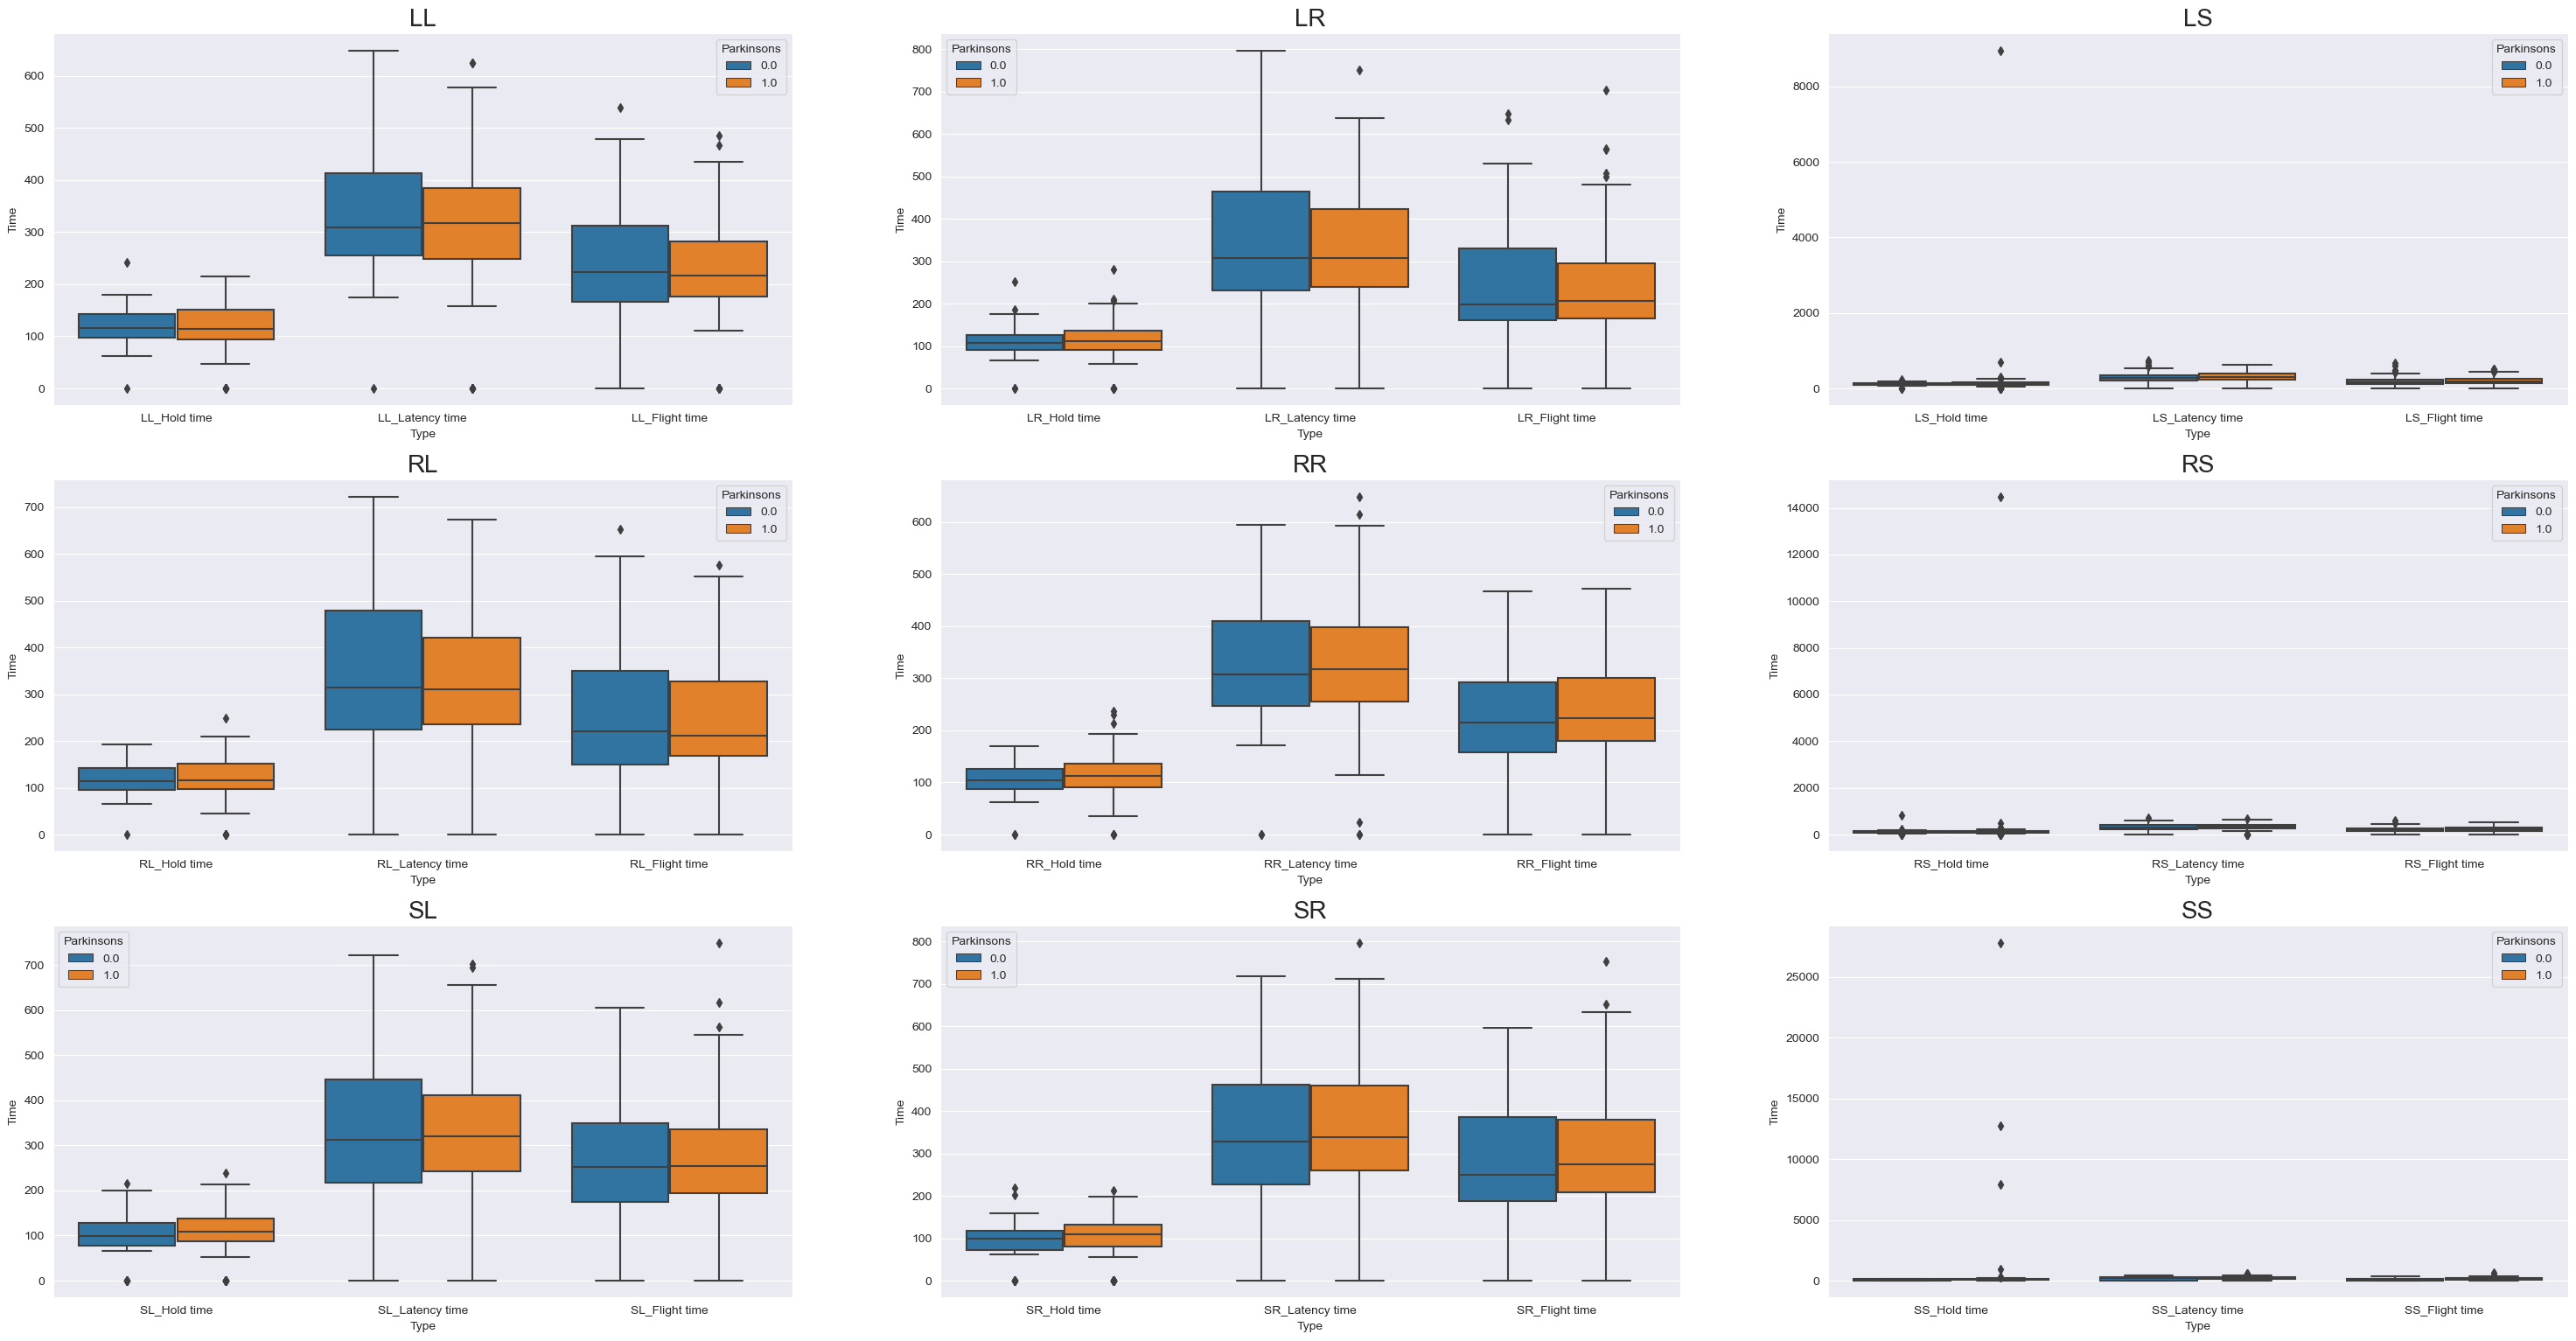

In [13]:
column_names = [first_hand + second_hand + '_' + time 
                for first_hand in ['L', 'R', 'S'] 
                for second_hand in ['L', 'R', 'S'] 
                for time in ['Hold time', 'Latency time', 'Flight time']]


f, ax = plt.subplots(3, 3, figsize=(10, 5))

plt.subplots_adjust(
    right = 3,
    top = 3
)

for i in range(9):
    temp_columns = column_names[3 * i : 3 * i + 3]
    stacked_df = combined_user_df[temp_columns].stack().reset_index()
    
    stacked_df = stacked_df.rename(
        columns={'level_0': 'index', 'level_1': 'Type', 0: 'Time'})
    stacked_df = stacked_df.set_index('index')

    for index in stacked_df.index:
        stacked_df.loc[index, 'Parkinsons'] = combined_user_df.loc[index, 'Parkinsons']
    
    sns.boxplot(x='Type', y='Time',
                hue='Parkinsons',
                data=stacked_df,
                ax=ax[i // 3][i % 3]
                ).set_title(column_names[i * 3][: 2], fontsize=20)
    
plt.show()

Correlation matrix to visualize relationships between features

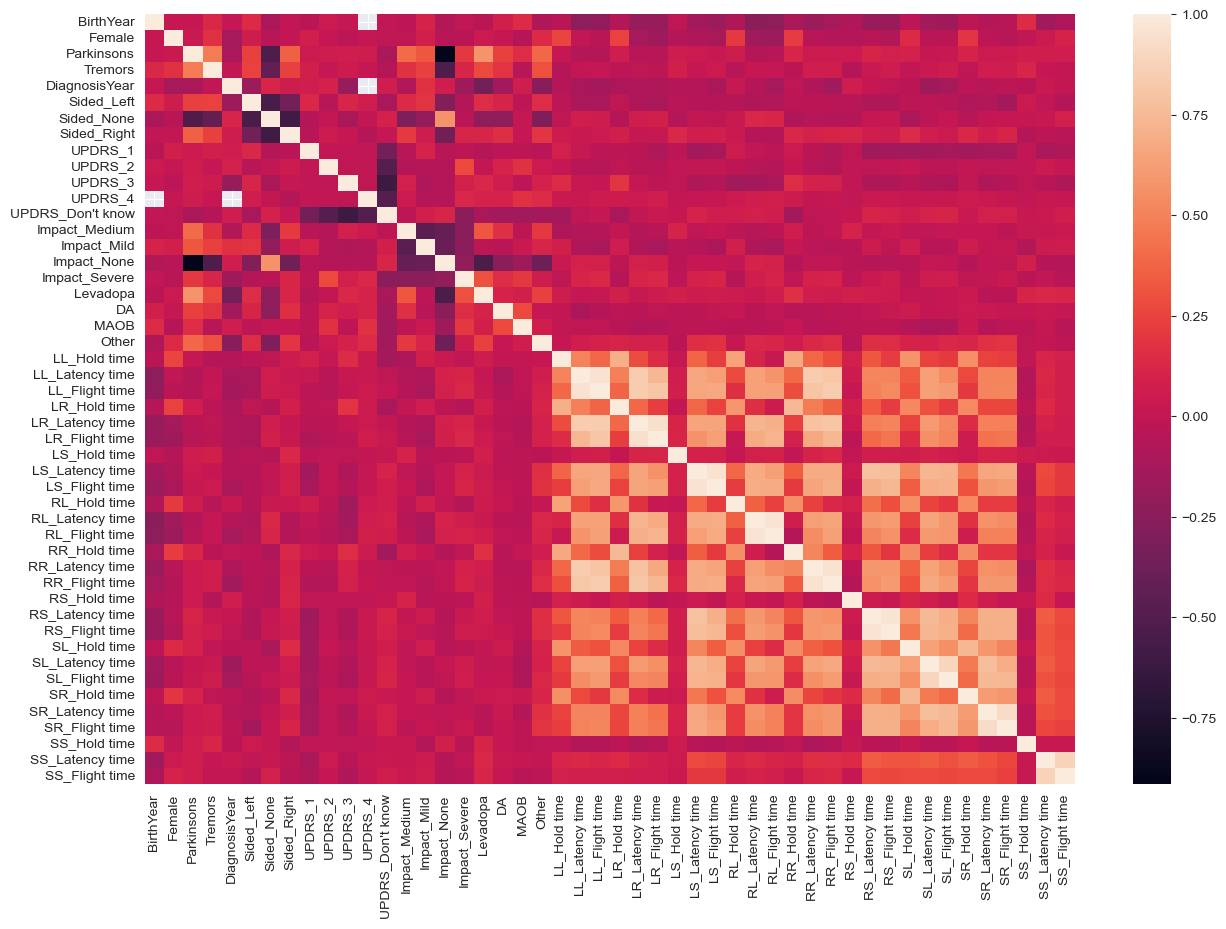

In [14]:
corr_matrix = combined_user_df.corr()

f, ax = plt.subplots(1, 1, figsize=(15, 10))
sns.heatmap(corr_matrix)

plt.show()

Fit a machine learning model to the data and obtain its feature importance

C:\Users\BruceVanHorn\anaconda3\envs\pipeline\lib\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
C:\Users\BruceVanHorn\anaconda3\envs\pipeline\lib\site-packages\sklearn\svm\_base.py:1242: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


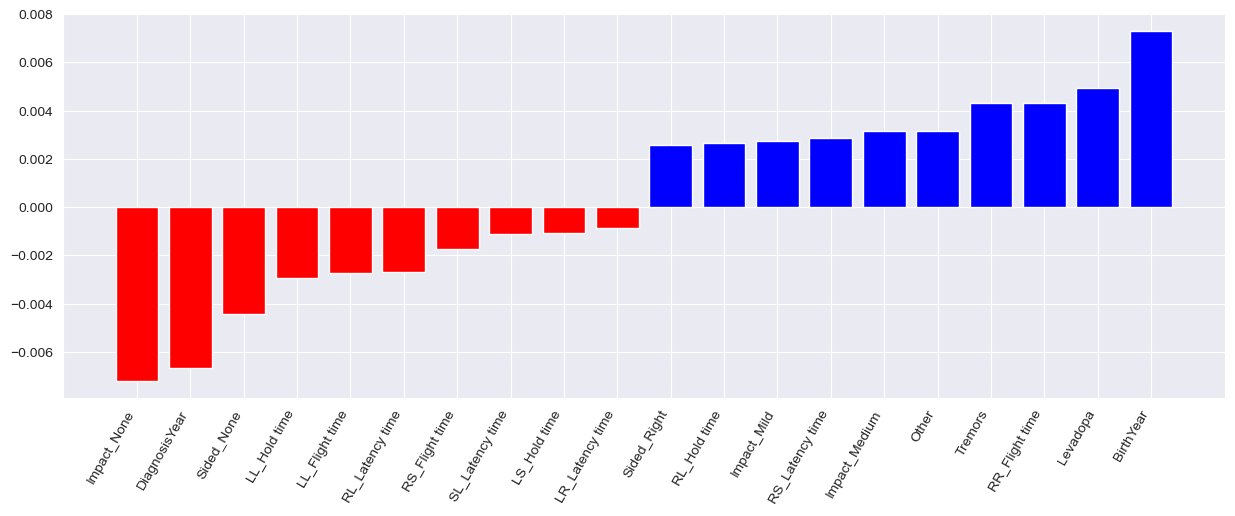

In [16]:
from sklearn.svm import LinearSVC


combined_user_df['BirthYear'].fillna(combined_user_df['BirthYear'].mode(dropna=True)[0], inplace=True)
combined_user_df['DiagnosisYear'].fillna(combined_user_df['DiagnosisYear'].mode(dropna=True)[0], inplace=True)

X_train = combined_user_df.drop(['Parkinsons'], axis=1)
y_train = combined_user_df['Parkinsons']

clf = LinearSVC()
clf.fit(X_train, y_train)


nfeatures = 10

coef = clf.coef_.ravel()
top_positive_coefs = np.argsort(coef)[-nfeatures :]
top_negative_coefs = np.argsort(coef)[: nfeatures]
top_coefs = np.hstack([top_negative_coefs, top_positive_coefs])

plt.figure(figsize=(15, 5))
colors = ['red' if c < 0 else 'blue' for c in coef[top_coefs]]
plt.bar(np.arange(2 * nfeatures), coef[top_coefs], color=colors)
feature_names = np.array(X_train.columns)
# Make sure the number of tick locations matches the number of tick labels.
plt.xticks(np.arange(0, 2 * nfeatures), feature_names[top_coefs], rotation=60, ha='right')

plt.show()
